MyCircle example from [ipython-in-depth](https://github.com/ipython/ipython-in-depth)


In [1]:
class MyCircle(object):

    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color

    def _repr_html_(self):
        return "&#x25CB; (<b>html</b>)"

    def _repr_svg_(self):
        return """<svg width="100px" height="100px">
           <circle cx="50" cy="50" r="20" stroke="black" stroke-width="1" fill="blue"/>
        </svg>"""
    
    def _repr_latex_(self):
        return r"$\bigcirc \LaTeX$"

    def _repr_javascript_(self):
        return "alert('I am a circle!');"

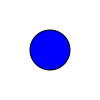

In [2]:
mc=MyCircle(30)
mc

The javascript representation (which is the default in jupyter) 
opens a pop-up like this one:
![](old_js_repr.png)
I would like it to show a javascript figure of a circle instead.

A circle can be made like this, but defining html and javascript and using two consecutive display functions.

In [3]:
from IPython.display import display_html, display_javascript

In [4]:
t='''<html>
        <head></head>
        <body>
            <canvas id='circle'/>
        </body>
     </html>'''

js='''var c = document.getElementById("circle");
var ctx = c.getContext("2d");
ctx.beginPath();
ctx.arc(100, 75, 20, 0, 2 * Math.PI);
ctx.stroke();'''
display_html(t, raw=True)
display_javascript(js, raw=True)

I crudely modified the class to return a circle also for javascript 

In [5]:
class MyCircle(object):

    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color

    def _repr_html_(self):
        return "&#x25CB; (<b>html</b>)"

    def _repr_svg_(self):
        return """<svg width="100px" height="100px">
           <circle cx="50" cy="50" r="20" stroke="black" stroke-width="1" fill="blue"/>
        </svg>"""
    
    def _repr_latex_(self):
        return r"$\bigcirc \LaTeX$"

    def _repr_javascript_(self):
        from IPython.display import display_html
        html='''<html>
                  <head></head>
                  <body>
                    <canvas id='mycircle'/>
                  </body>
               </html>'''
        display_html(html, raw=True)
        
        js='''var c = document.getElementById("mycircle");
        var ctx = c.getContext("2d");
        ctx.beginPath();
        ctx.arc(100, 75, {}, 0, 2 * Math.PI);
        ctx.stroke();'''.format(self.radius)

        return js

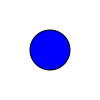

In [10]:
from IPython.display import display_svg
display_svg(mc._repr_svg_(), raw=True)

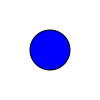

In [6]:
mc=MyCircle(radius=50)
mc

Inspiration for the modified code came from [http://www.w3schools.com/](http://www.w3schools.com/tags/canvas_arc.asp) for the circle drawing javascript and from the Github repo [Who8MyLunch/ipynb_widget_canvas](https://github.com/Who8MyLunch/ipynb_widget_canvas) for how to get the javascript to display.

I would eventually like to create a javascript representation consisting of box and lines as below. The underlying object would perhaps be a biopython SeqRecord like object. 

![figure](assembly_figure_mock_up.png)

Clicking on one of the boxes would give access to the underlying sequence in a small text window in a simila manner as for [AngularPlasmid](http://angularplasmid.vixis.com/)

![ap](angularplasmidscreenshot.png)

In [4]:
from IPython.display import display_html, display_javascript
html='''<html>
          <head></head>
          <body>
            <canvas id='myCanvas'/>
          </body>
       </html>'''
display_html(html, raw=True)





js="""function getMousePos(canvas, event) {
	var rect = canvas.getBoundingClientRect();
	return {
		x: event.clientX - rect.left,
		y: event.clientY - rect.top
	};
}
function isInside(pos, rect){
	return pos.x > rect.x && pos.x < rect.x+rect.width && pos.y < rect.y+rect.heigth && pos.y > rect.y
}

var canvas = document.getElementById('myCanvas');
var context = canvas.getContext('2d');
var rect = {
	x:250,
	y:350,
	width:200,
	heigth:100
};

canvas.addEventListener('click', function(evt) {
	var mousePos = getMousePos(canvas, evt);
    debugger;
	if (isInside(mousePos,rect)) {
		alert('clicked inside rect');
    }else{
        alert('clicked outside rect');
    }	
}, false);

context.beginPath();
context.rect(250, 350, 200, 100); 
context.fillStyle = '#FFFFFF'; 
context.fillStyle = 'rgba(225,225,225,0.5)';
context.fillRect(25,72,32,32);
context.fill(); 
context.lineWidth = 2;
context.strokeStyle = '#000000'; 
context.stroke();
context.closePath();
context.font = '40pt Kremlin Pro Web';
context.fillStyle = '#000000';
context.fillText('Start', 345, 415);"""

In [5]:
display_html(html, raw=True)

In [7]:
svg="""
<!DOCTYPE html>
<html>
<body>

<h1>My first SVG</h1>

<svg width="100" height="100">
   <circle cx="50" cy="50" r="40" stroke="green" stroke-width="4" fill="yellow" />
   Sorry, your browser does not support inline SVG.
</svg> 
 
</body>
</html>"""
from IPython.display import display_svg
display_svg(svg, raw=True)